In [3]:
%pip install wbdata
%pip install geodatasets
import geodatasets
import wbdata
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geodatasets import get_path
import numpy as np
import matplotlib.ticker as mticker

  Using cached wbdata-1.0.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached backoff-2.2.1-py3-none-any.whl.metadata (14 kB)
  Using cached dateparser-1.2.1-py3-none-any.whl.metadata (29 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.8.10-py3-none-any.whl.metadata (25 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached wbdata-1.0.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached backoff-2.2.1-py3-none-any.whl (15 kB)
Using cached dateparser-1.2.1-py3-none-any.whl (295 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2024.1
    Uninstalling pytz-2024.1:
      Successfully uninstalled pytz-2024.1
ERROR: pi

Key '-7503229990879439606' not in persistent cache.
Key '-2783549736798890866' not in persistent cache.
Key '-3294436938433017948' not in persistent cache.
Key '-8350911456366299014' not in persistent cache.
Key '-451827147966107530' not in persistent cache.
Key '6568872843256280046' not in persistent cache.
Key '3067242366581776739' not in persistent cache.
Key '-5094144810058118433' not in persistent cache.
Key '-6294755549590782904' not in persistent cache.
Key '5025187309445151468' not in persistent cache.
Key '4736488769939496229' not in persistent cache.
Key '-4742110138603082813' not in persistent cache.
Key '7651837098108163865' not in persistent cache.
Key '-3131717490618461317' not in persistent cache.
Key '7153639406451195127' not in persistent cache.
Key '7407876819000521090' not in persistent cache.
Key '3626679632364222571' not in persistent cache.
Key '-7610703670843674950' not in persistent cache.
Key '-6189146998289609411' not in persistent cache.
Key '-146946674420906

In [4]:
SOURCE = 40 
indicators = wbdata.get_indicators(source=SOURCE)
#indicators

In [5]:
wbdata.get_countries()

id    name
----  --------------------------------------------------------------------------------
ABW   Aruba
AFE   Africa Eastern and Southern
AFG   Afghanistan
AFR   Africa
AFW   Africa Western and Central
AGO   Angola
ALB   Albania
AND   Andorra
ARB   Arab World
ARE   United Arab Emirates
ARG   Argentina
ARM   Armenia
ASM   American Samoa
ATG   Antigua and Barbuda
AUS   Australia
AUT   Austria
AZE   Azerbaijan
BDI   Burundi
BEA   East Asia & Pacific (IBRD-only countries)
BEC   Europe & Central Asia (IBRD-only countries)
BEL   Belgium
BEN   Benin
BFA   Burkina Faso
BGD   Bangladesh
BGR   Bulgaria
BHI   IBRD countries classified as high income
BHR   Bahrain
BHS   Bahamas, The
BIH   Bosnia and Herzegovina
BLA   Latin America & the Caribbean (IBRD-only countries)
BLR   Belarus
BLZ   Belize
BMN   Middle East & North Africa (IBRD-only countries)
BMU   Bermuda
BOL   Bolivia
BRA   Brazil
BRB   Barbados
BRN   Brunei Darussalam
BSS   Sub-Saharan Africa (IBRD-only countries)
BTN   Bhutan
BWA  

In [73]:
variable_labels = {"SM.POP.NETM":"Net Migration"}
country_mapping = {"NZL":"New Zealand", "FJI": "Fiji", "SLB":"Solomon Islands"}
df = wbdata.get_dataframe(variable_labels, country=list(country_mapping.keys()), parse_dates=True)
df = df.reset_index()
df["ISO_A3"] = df["country"].map({v: k for k, v in country_mapping.items()})
df

,country,date,Net Migration,ISO_A3
0,Fiji,2023-01-01,-3289.0,FJI
1,Fiji,2022-01-01,-3557.0,FJI
2,Fiji,2021-01-01,-6008.0,FJI
3,Fiji,2020-01-01,-6008.0,FJI
4,Fiji,2019-01-01,-11873.0,FJI
...,...,...,...,...
187,Solomon Islands,1964-01-01,-1200.0,SLB
188,Solomon Islands,1963-01-01,-1129.0,SLB
189,Solomon Islands,1962-01-01,-1073.0,SLB
190,Solomon Islands,1961-01-01,-1016.0,SLB


In [74]:
countries = [c['id'] for c in wbdata.get_countries()]

In [75]:
shapefile_path = "/home/jovyan/Project 1/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

gdf = gpd.read_file(shapefile_path)

In [76]:
df.reset_index(inplace=True)

In [77]:
wb_countries = wbdata.get_countries()

matching_columns = [col for col in gdf.columns if "ISO" in col] 

In [78]:
merged_gdf = gdf.merge(df, on="ISO_A3", how="left")

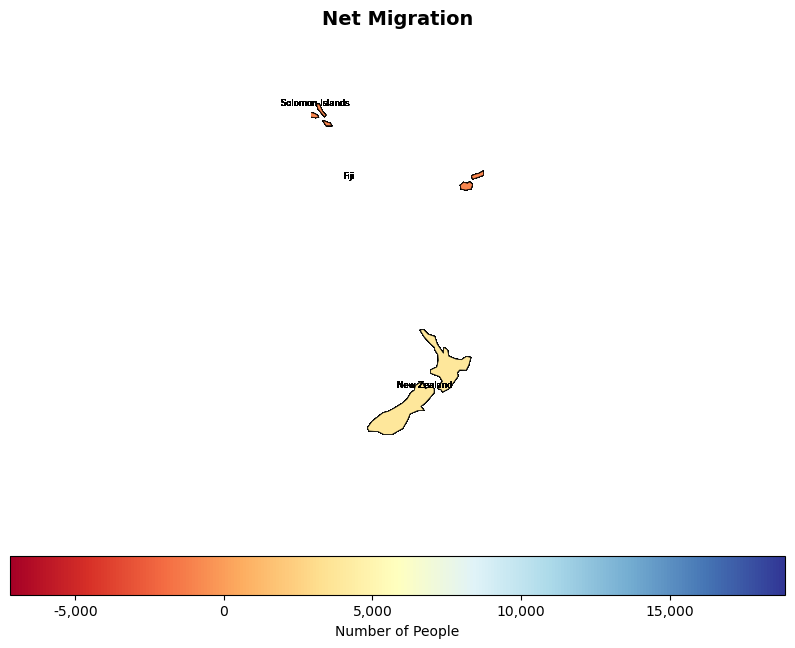

In [85]:
fig, ax = plt.subplots(figsize=(10, 8))

vmin = merged_gdf["Net Migration"].min()
vmax = merged_gdf["Net Migration"].max()

scaling_factor = 0.25
vmin, vmax = vmin * scaling_factor, vmax * scaling_factor 

merged_gdf.plot(column="Net Migration", cmap="RdYlBu", linewidth=0.5, edgecolor="black",
                         legend=True, legend_kwds={"label": "Number of People", "orientation": "horizontal"}, ax=ax,
               vmin=vmin, vmax=vmax
               )

ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.axis("off")

ax.set_xlim([160, 180]) 
ax.set_ylim([-50, 0])
ax.set_title("Net Migration", fontsize=14, fontweight="bold")

for idx, row in merged_gdf.iterrows():
    country_name = row["SOVEREIGNT"]
    if isinstance(country_name, str) and not pd.isna(row["Net Migration"]):
        ax.annotate(
            text=country_name,
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            xytext=(3, 3),
            textcoords="offset points",
            fontsize=6,
            ha='center'
        )

cbar = ax.get_figure().axes[-1]
cbar.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.show()